## Collaborative Filtering 协同过滤

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

%matplotlib inline

from subprocess import check_output
print(check_output(["ls", "../../ml-100k/"]).decode("utf8"))

README
allbut.pl
mku.sh
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test
数据集介绍.txt



In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1', parse_dates=True) 

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('../../ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
         'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
          'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
          'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../ml-100k/u.item', sep='|', names=m_cols,encoding='latin-1')

movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

df.head(32)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,308,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),0,0,0,0,0,...,1,0,0,308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,0,...,1,0,0,308,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,0,0,0,0,0,...,0,0,0,308,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,0,1,0,0,0,...,1,0,0,308,4,887739056,60,M,retired,95076


In [110]:
str(movies[movies['movie_id']==1]['release_date'].values)[2:-2]

'01-Jan-1995'

In [3]:
ratings.head(1)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949


In [4]:
movies.head(1)

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...


In [5]:
users.head(1)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711


### 数据预处理

In [3]:
# df.drop(df.columns[[3,4,7]], axis=1, inplace=True)
# ratings.drop( "unix_timestamp", inplace = True, axis = 1 ) 
# movies.drop(movies.columns[[3,4]], inplace = True, axis = 1 )
# # 去除无用信息
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
movie_id        100000 non-null int64
title           100000 non-null object
release_date    99991 non-null object
user_id         100000 non-null int64
rating          100000 non-null int64
age             100000 non-null int64
sex             100000 non-null object
occupation      100000 non-null object
zip_code        100000 non-null object
dtypes: int64(4), object(5)
memory usage: 7.6+ MB


### 电影评分

In [21]:
movie_stats = df.groupby(['title', 'movie_id']).agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                                     size      mean
title                     movie_id                 
'Til There Was You (1997) 1300          9  2.333333
1-900 (1994)              1353          5  2.600000
101 Dalmatians (1996)     225         109  2.908257
12 Angry Men (1957)       178         125  4.344000
187 (1997)                330          41  3.024390

### 提取评分数量大于50的电影

In [22]:
min_50 = movie_stats['rating']['size'] >= 50
movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head()

rating          
                                                              size      mean
title                                              movie_id                 
Close Shave, A (1995)                              408         112  4.491071
Schindler's List (1993)                            318         298  4.466443
Wrong Trousers, The (1993)                         169         118  4.466102
Casablanca (1942)                                  483         243  4.456790
Wallace & Gromit: The Best of Aardman Animation... 114          67  4.447761

### 获取人气电影title和id

In [23]:
hot = movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head(20)
h = []
for i in range(20):
    h.append([hot.index[i][0][:-6], '/recsys/dilates?m='+str(hot.index[i][1])])

print(h)

[['Close Shave, A ', '/recsys/dilates?m=408'], ["Schindler's List ", '/recsys/dilates?m=318'], ['Wrong Trousers, The ', '/recsys/dilates?m=169'], ['Casablanca ', '/recsys/dilates?m=483'], ['Wallace & Gromit: The Best of Aardman Animation ', '/recsys/dilates?m=114'], ['Shawshank Redemption, The ', '/recsys/dilates?m=64'], ['Rear Window ', '/recsys/dilates?m=603'], ['Usual Suspects, The ', '/recsys/dilates?m=12'], ['Star Wars ', '/recsys/dilates?m=50'], ['12 Angry Men ', '/recsys/dilates?m=178'], ['Third Man, The ', '/recsys/dilates?m=513'], ['Citizen Kane ', '/recsys/dilates?m=134'], ['To Kill a Mockingbird ', '/recsys/dilates?m=427'], ["One Flew Over the Cuckoo's Nest ", '/recsys/dilates?m=357'], ['Silence of the Lambs, The ', '/recsys/dilates?m=98'], ['North by Northwest ', '/recsys/dilates?m=480'], ['Godfather, The ', '/recsys/dilates?m=127'], ['Secrets & Lies ', '/recsys/dilates?m=285'], ['Good Will Hunting ', '/recsys/dilates?m=272'], ['Manchurian Candidate, The ', '/recsys/dilates

### 获取最新电影

In [15]:
movies[movies['movie_id']==1]['title']

0    Toy Story (1995)
Name: title, dtype: object

In [81]:
movies.sort_values('release_date', ascending=True)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
872,873,Picture Perfect (1997),01-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Picture+Perfe...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
261,262,In the Company of Men (1997),01-Aug-1997,NaN,http://us.imdb.com/M/title-exact?In+the+Compan...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,261,Air Bud (1997),01-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Air+Bud+(1997),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
357,358,Spawn (1997),01-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Spawn+(1997/I),0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1190,1191,"Letter From Death Row, A (1998)",01-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Letter+From+D...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1669,1670,Tainted (1998),01-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Tainted+(1998),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
674,675,"Nosferatu (Nosferatu, eine Symphonie des Graue...",01-Jan-1922,NaN,"http://us.imdb.com/M/title-exact?Nosferatu,%20...",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1541,1542,"Scarlet Letter, The (1926)",01-Jan-1926,NaN,http://us.imdb.com/M/title-exact?Scarlet%20Let...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
616,617,"Blue Angel, The (Blaue Engel, Der) (1930)",01-Jan-1930,NaN,http://us.imdb.com/M/title-exact?Blaue%20Engel...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
655,656,M (1931),01-Jan-1931,NaN,http://us.imdb.com/M/title-exact?M%20(1931),0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [84]:
new = movies.sort_values('release_date', ascending=True).head(8)
n = []
types = ['未知', '动作', '冒险', '动漫', '儿童', '喜剧', '犯罪',
          '纪录片', '戏剧', '奇幻', '黑暗', '恐怖', '音乐', '神秘',
          '浪漫', '科幻', '惊悚', '战争', '西部']
for nn in new.values:
    type = []
    for i in range(1, 20):
        if nn[i+4]==1:
            type.append(types[i-1])
    t = {'poster': '/static/posters/'+str(nn[0])+'.png', 'title': nn[1][:-6], 'type': type}
    n.append(t)
n

[{'poster': '/static/posters/873.png',
  'title': 'Picture Perfect ',
  'type': ['喜剧', '浪漫']},
 {'poster': '/static/posters/262.png',
  'title': 'In the Company of Men ',
  'type': ['戏剧']},
 {'poster': '/static/posters/261.png',
  'title': 'Air Bud ',
  'type': ['儿童', '喜剧']},
 {'poster': '/static/posters/358.png',
  'title': 'Spawn ',
  'type': ['动作', '冒险', '科幻', '惊悚']},
 {'poster': '/static/posters/1191.png',
  'title': 'Letter From Death Row, A ',
  'type': ['犯罪', '戏剧']},
 {'poster': '/static/posters/1670.png',
  'title': 'Tainted ',
  'type': ['喜剧', '惊悚']},
 {'poster': '/static/posters/675.png',
  'title': 'Nosferatu (Nosferatu, eine Symphonie des Grauens) ',
  'type': ['恐怖']},
 {'poster': '/static/posters/1542.png',
  'title': 'Scarlet Letter, The ',
  'type': ['戏剧']}]

### 获取某种类型的电影

In [119]:
movie_t = movies.loc[movies['Action'] == 1].head(25)
movie_t

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
20,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
21,22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,24,Rumble in the Bronx (1995),23-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Hong%20Faan%2...,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,27,Bad Boys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Bad%20Boys%20...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,28,Apollo 13 (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Apollo%2013%2...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28,29,Batman Forever (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Batman%20Fore...,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32,33,Desperado (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Desperado%20(...,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


### 评分分布

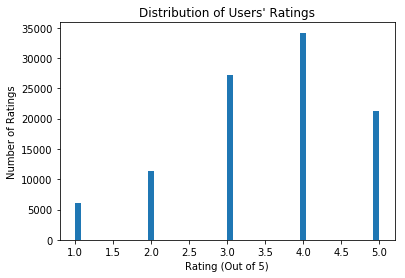

In [14]:
ratings.rating.plot.hist(bins=50)
plt.title("Distribution of Users' Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)');

### 年龄分布

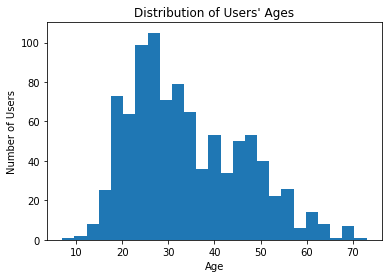

In [15]:
users.age.plot.hist(bins=25)
plt.title("Distribution of Users' Ages")
plt.ylabel('Number of Users')
plt.xlabel('Age');

### 评分矩阵

In [4]:
ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 评分矩阵转置

In [30]:
watch_matrix = ratings.pivot_table(index=['user_id'],columns=['movie_id'],values='rating').reset_index(drop=True)
watch_matrix.fillna( 0, inplace = True )
watch_matrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 电影余弦相似度矩阵

In [5]:
movie_similarity = 1 - pairwise_distances( ratings_matrix, metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix = pd.DataFrame( movie_similarity )
ratings_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,0.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,0.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


### 用户余弦相似度

In [31]:
movie_similarity = 1 - pairwise_distances( watch_matrix, metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
watch_matrix = pd.DataFrame( movie_similarity )
watch_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,0.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,0.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,0.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,0.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,0.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


### item-based推荐

In [16]:
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp="Speed (1994)"
    inp=movies[movies['title']==user_inp].index.tolist()
    inp=inp[0]
    
    movies['similarity'] = ratings_matrix.iloc[inp]
    movies = movies['movie_id', 'title', 'release_date','similarity']
#     movies.drop(movies.columns[list(range(3,8))], inplace = True, axis = 1 )
    movies.head(2)
    
except:
    print("Sorry, the movie is not in the database!")

Sorry, the movie is not in the database!


In [17]:
sim = movies.sort_values( ["similarity"], ascending = False )[1:10]
for s in sim.values:
    t = []
    t.append('/recsys/dilates?m='+str(s[0]))
    t.append(s[0])
    t.append(s[1][:-6])
    t.append(str(s[24]*100)[:4]+'%')
    print(t)

['/recsys/dilates?m=385', 385, 'True Lies ', '71.9%']
['/recsys/dilates?m=161', 161, 'Top Gun ', '70.7%']
['/recsys/dilates?m=79', 79, 'Fugitive, The ', '69.6%']
['/recsys/dilates?m=96', 96, 'Terminator 2: Judgment Day ', '69.5%']
['/recsys/dilates?m=195', 195, 'Terminator, The ', '67.6%']
['/recsys/dilates?m=174', 174, 'Raiders of the Lost Ark ', '67.6%']
['/recsys/dilates?m=210', 210, 'Indiana Jones and the Last Crusade ', '67.4%']
['/recsys/dilates?m=550', 550, 'Die Hard: With a Vengeance ', '67.4%']
['/recsys/dilates?m=204', 204, 'Back to the Future ', '66.5%']


In [8]:
print("Recommended movies based on your choice of ",user_inp ,": \n", movies.sort_values( ["similarity"], ascending = False )[1:10])

Recommended movies based on your choice of  Speed (1994) : 
      movie_id                                      title release_date  \
384       385                           True Lies (1994)  01-Jan-1994   
160       161                             Top Gun (1986)  01-Jan-1986   
78         79                       Fugitive, The (1993)  01-Jan-1993   
95         96          Terminator 2: Judgment Day (1991)  01-Jan-1991   
194       195                     Terminator, The (1984)  01-Jan-1984   
173       174             Raiders of the Lost Ark (1981)  01-Jan-1981   
209       210  Indiana Jones and the Last Crusade (1989)  01-Jan-1989   
549       550          Die Hard: With a Vengeance (1995)  01-Jan-1995   
203       204                  Back to the Future (1985)  01-Jan-1985   

     video_release_date                                           imdb_url  \
384                 NaN  http://us.imdb.com/M/title-exact?True%20Lies%2...   
160                 NaN  http://us.imdb.com/M/title-

### user-based推荐

In [31]:
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_id=3
    
    users['similarity'] = watch_matrix.iloc[user_id-1]
    users.head(2)
    
except:
    print("Sorry, no such user")

In [32]:
print('similar user for user ', user_id, ':\n', users.sort_values( ["similarity"], ascending = False )[1:10])

similar user for user  3 :
      user_id  age sex     occupation zip_code  similarity
488      489   55   M          other    45218    0.485925
615      616   55   M      scientist    50613    0.482921
586      587   26   M          other    14216    0.468834
783      784   47   M  administrator    91040    0.467442
316      317   22   M  administrator    13210    0.462768
751      752   60   M        retired    21201    0.455051
723      724   31   M      executive    40243    0.453973
334      335   45   M      executive    33775    0.445496
771      772   50   M         writer    27105    0.443870


In [38]:
# 评分个数大于200的地电影id
movie_stats = movie_ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})
min_50 = movie_stats['rating']['size'] >= 200
min_50 = movie_stats[min_50].index
print(min_50)

Int64Index([  1,   4,   7,   8,   9,  11,  12,  15,  22,  25,
            ...
            515, 546, 568, 588, 597, 603, 655, 678, 742, 748],
           dtype='int64', name='movie_id', length=118)


In [49]:
u_watched = movie_ratings[movie_ratings['user_id']==user_id]
u_watched_id = u_watched['movie_id'] # 该用户看过的电影id
sim_u = users.sort_values( ["similarity"], ascending = False )[1:2]['user_id'] # 相似用户id
rec = []
for su in sim_u:
    sim_u_watched = movie_ratings[movie_ratings['user_id']==su]
    for suw in sim_u_watched.values:
        if suw[0] not in u_watched_id:
            if suw[0] in min_50:
                rec.append(suw)
rec[0]

array([245, "Devil's Own, The (1997)", '26-Mar-1997', nan,
       'http://us.imdb.com/M/title-exact?Devil%27s%20Own%2C%20The%20(1997)',
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 489, 3,
       891366838], dtype=object)